In [1]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
sys.path.insert(0,'/home/albert7a/lib/python/cartopy/lib/cartopy')
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import datetime
import matplotlib.dates as mdates

%matplotlib inline


/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1685: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


In [104]:
simu60='IBI60-CJM165'
dir60='/media/extra/DATA/IBI/IBI60-CJM165-S/'
files60='IBI60-CJM165_y201?m??d??.1h_gridT.nc'
tfiles60=dir60+files60
ds60 = xr.open_mfdataset(tfiles60,concat_dim='time_counter')

simu12='IBI12.L75-MAA13'
dir12='/media/extra/DATA/IBI/IBI12.L75-MAA13-S/'
files12='IBI12.L75-MAA13_y201?m??d??.1h_SSH.nc'
tfiles12=dir12+files12
ds12 = xr.open_mfdataset(tfiles12,concat_dim='time_counter')


In [109]:
ds60

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, time_counter: 4824, x: 1923, y: 3454)
Coordinates:
    nav_lat              (time_counter, y, x) float32 26.5939 26.5939 ...
    nav_lon              (time_counter, y, x) float32 -23.133 -23.1163 ...
    time_centered        (time_counter) datetime64[ns] 2012-06-14T00:30:00 ...
  * time_counter         (time_counter) datetime64[ns] 2012-06-14T00:30:00 ...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    sossheig             (time_counter, y, x) float64 nan nan nan nan nan ...
    time_counter_bounds  (time_counter, axis_nbounds) float64 1.718e+09 ...

In [110]:
ds12

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, time_counter: 17544, x: 385, y: 691)
Coordinates:
    nav_lat              (y, x) float32 26.579 26.579 26.579 26.5789 26.5789 ...
    nav_lon              (y, x) float32 -23.1663 -23.083 -22.9996 -22.9163 ...
    time_centered        (time_counter) datetime64[ns] 2012-01-01T00:30:00 ...
  * time_counter         (time_counter) datetime64[ns] 2012-01-01T00:30:00 ...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    sossheig             (time_counter, y, x) float64 -1.138 -1.14 -1.143 ...
    time_counter_bounds  (time_counter, axis_nbounds) float64 3.534e+09 ...

In [111]:
lon60=ds60.nav_lon[0]
lat60=ds60.nav_lat[0]
ssh60=ds60.sossheig
lon12=ds12.nav_lon
lat12=ds12.nav_lat
ssh12=ds12.sossheig

In [106]:
ssh60.shape

(4824, 3454, 1923)

In [107]:
ssh12.shape

(17544, 691, 385)

In [113]:
ssh12_2512=ssh12.sel(time_counter='2012-12-25')
ssh60_2512=ssh60.sel(time_counter='2012-12-25')

In [114]:
diff_ssh60=ssh60_2512[1]-ssh60_2512[12]
diff_ssh12=ssh12_2512[1]-ssh12_2512[12]

In [50]:
def plot_ibi_mercator(fig,sub,var,lat,lon,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.Mercator())
        cmap = plt.get_cmap(pal)
        ax.set_extent([-20, 12, 28, 66])
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
        ax.add_feature(cfeature.LAND,facecolor='grey')
        ax.coastlines(resolution='50m')
        gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

        fig.subplots_adjust(right=0.8)
        gl.xlocator = mticker.FixedLocator([-24,-18,-12,-6,0,6,12,18,24])
        gl.ylocator = mticker.FixedLocator([20,24,28,32,36,40,44,48,52,56,60,64,68,72])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 15, 'color': 'gray'}
        gl.ylabel_style = {'size': 15, 'color': 'gray'}
        gl.xlabels_top = False
        gl.ylabels_left = False

        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label=unit)
        ax.set_title(name,size=17,y=1.08)


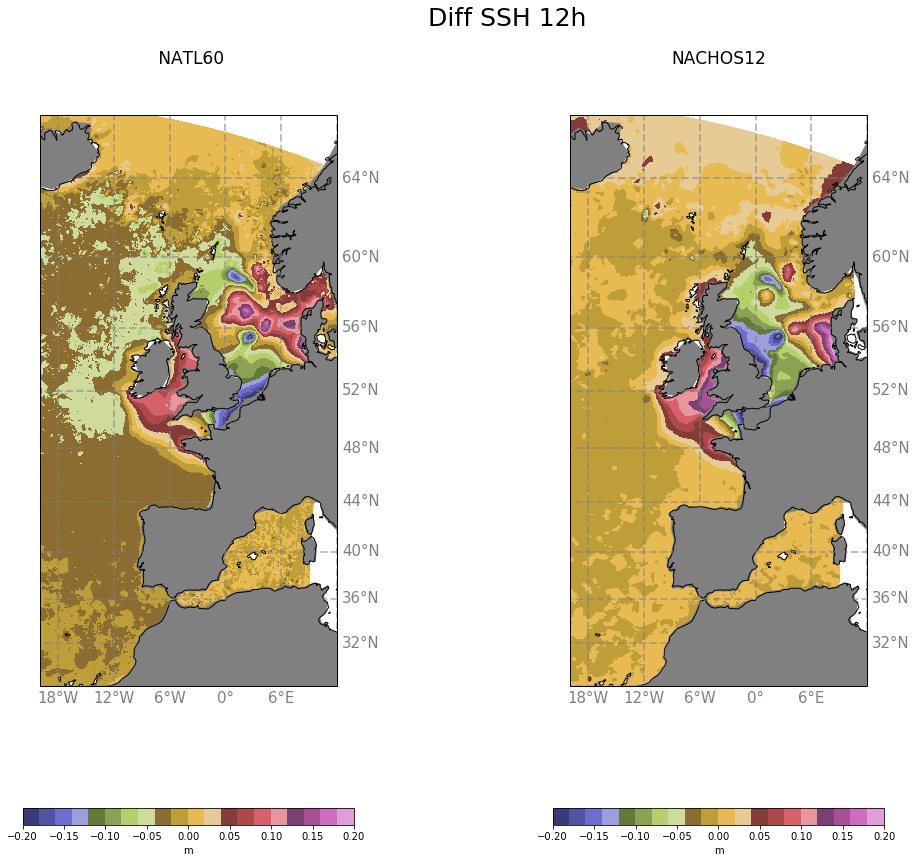

In [115]:
fig = plt.figure(figsize=(20,15))
plot_ibi_mercator(fig,121,diff_ssh60,lat60,lon60,-0.2,0.2,'m',' NATL60','tab20b')
plot_ibi_mercator(fig,122,diff_ssh12,lat12,lon12,-0.2,0.2,'m','NACHOS12','tab20b')
fig.suptitle('Diff SSH 12h', fontsize=25)


In [48]:
def plot_ibi_europp(fig,sub,var,lat,lon,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.EuroPP())
        cmap = plt.get_cmap(pal)
        #ax.set_extent([-20, 12, 28, 68])
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
        ax.add_feature(cfeature.LAND,facecolor='grey')
        ax.coastlines(resolution='50m')
        ax.gridlines()

        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label=unit)
        ax.set_title(name,size=17,y=1.08)


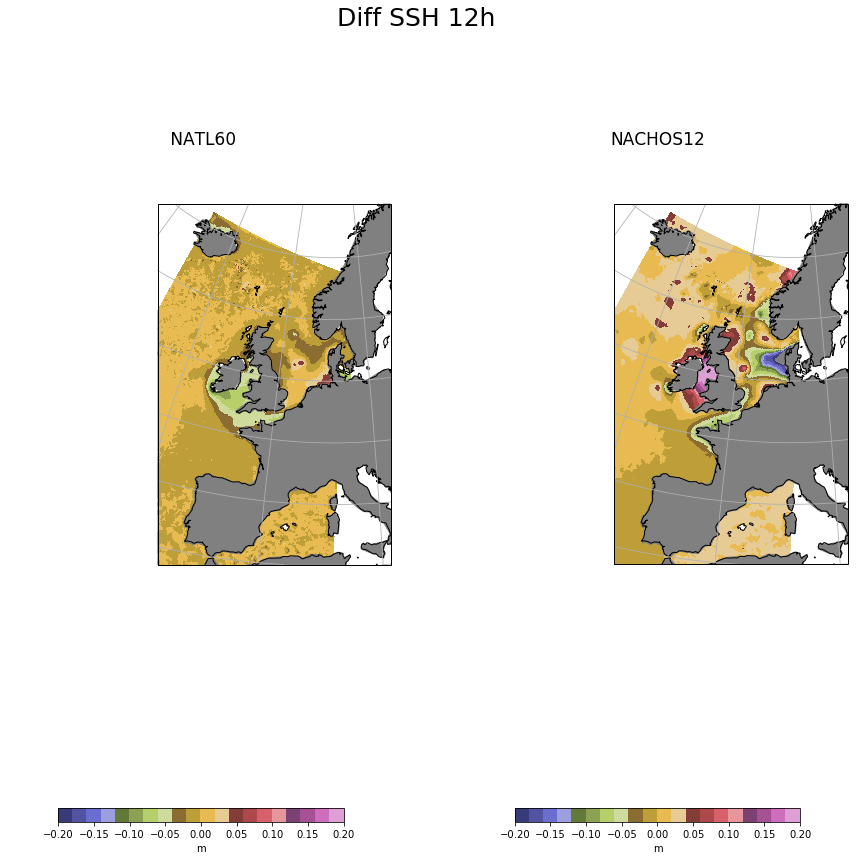

In [52]:
fig = plt.figure(figsize=(15,15))
plot_ibi_europp(fig,121,diff_ssh60,lat60,lon60,-0.2,0.2,'m',' NATL60','tab20b')
plot_ibi_europp(fig,122,diff_ssh12,lat12,lon12,-0.2,0.2,'m','NACHOS12','tab20b')
fig.suptitle('Diff SSH 12h', fontsize=25)


In [53]:
ds60

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, time_counter: 408, x: 1923, y: 3454)
Coordinates:
    nav_lat              (time_counter, y, x) float32 26.5939 26.5939 ...
    nav_lon              (time_counter, y, x) float32 -23.133 -23.1163 ...
    time_centered        (time_counter) datetime64[ns] 2012-06-14T00:30:00 ...
  * time_counter         (time_counter) datetime64[ns] 2012-06-14T00:30:00 ...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    sossheig             (time_counter, y, x) float64 nan nan nan nan nan ...
    time_counter_bounds  (time_counter, axis_nbounds) float64 1.718e+09 ...

In [54]:
ds12

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, time_counter: 8784, x: 385, y: 691)
Coordinates:
    nav_lat              (y, x) float32 26.579 26.579 26.579 26.5789 26.5789 ...
    nav_lon              (y, x) float32 -23.1663 -23.083 -22.9996 -22.9163 ...
    time_centered        (time_counter) datetime64[ns] 2012-01-01T00:30:00 ...
  * time_counter         (time_counter) datetime64[ns] 2012-01-01T00:30:00 ...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    sossheig             (time_counter, y, x) float64 -1.138 -1.14 -1.143 ...
    time_counter_bounds  (time_counter, axis_nbounds) float64 3.534e+09 ...

In [57]:
truc=ssh60.sel(time_counter='2012-06-14')

In [58]:
truc.shape

(24, 3454, 1923)

In [118]:
ssh12UK=ssh12.sel(x=260,y=437)
ssh12NOR=ssh12.sel(x=275,y=576)
ssh12IRL=ssh12.sel(x=194,y=383)
ssh12MED=ssh12.sel(x=348,y=200)

ssh60UK=ssh60.sel(x=1293,y=2180)
ssh60NOR=ssh60.sel(x=1369,y=2876)
ssh60IRL=ssh60.sel(x=967,y=1910)
ssh60MED=ssh60.sel(x=1734,y=999)


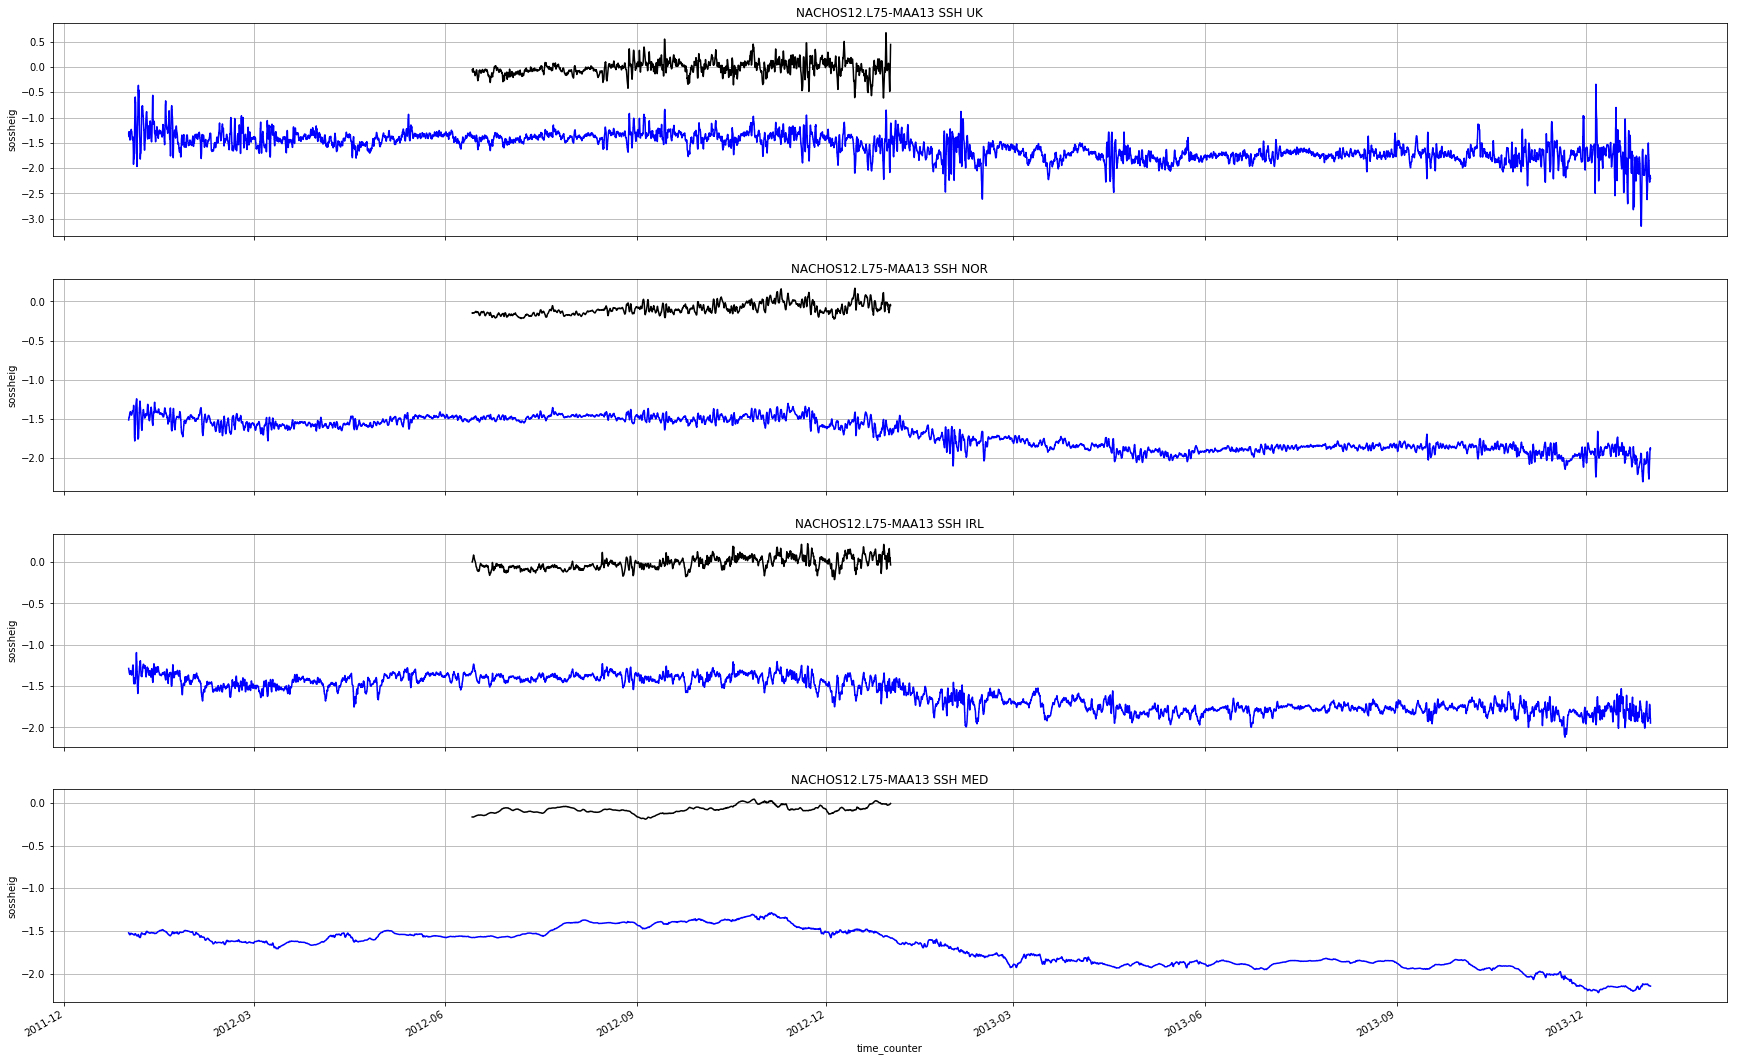

In [120]:
fig=plt.figure(figsize=(30,20))

ax = fig.add_subplot(411)
ssh12UK.plot.line('b')
ssh60UK.plot.line('k')
plt.title('NACHOS12.L75-MAA13 SSH UK')
plt.grid(True)

ax = fig.add_subplot(412)
ssh12NOR.plot.line('b')
ssh60NOR.plot.line('k')
plt.title('NACHOS12.L75-MAA13 SSH NOR')
plt.grid(True)

ax = fig.add_subplot(413)
ssh12IRL.plot.line('b')
ssh60IRL.plot.line('k')
plt.title('NACHOS12.L75-MAA13 SSH IRL')
plt.grid(True)

ax = fig.add_subplot(414)
ssh12MED.plot.line('b')
ssh60MED.plot.line('k')
plt.title('NACHOS12.L75-MAA13 SSH MED')
plt.grid(True)

plt.savefig('/media/extra/DATA/PLOTS/NACHOS12.L75-MAA13-SSH-UK-2012-2013.png')

In [87]:
ssh12UK=ssh12.sel(x=260,y=437,time_counter=slice('2012-01-01','2012-01-31'))
ssh12NOR=ssh12.sel(x=275,y=576,time_counter=slice('2012-01-01','2012-01-31'))
ssh12IRL=ssh12.sel(x=194,y=383,time_counter=slice('2012-01-01','2012-01-31'))
ssh12MED=ssh12.sel(x=348,y=200,time_counter=slice('2012-01-01','2012-01-31'))

In [86]:
ssh12UK.shape

(744,)

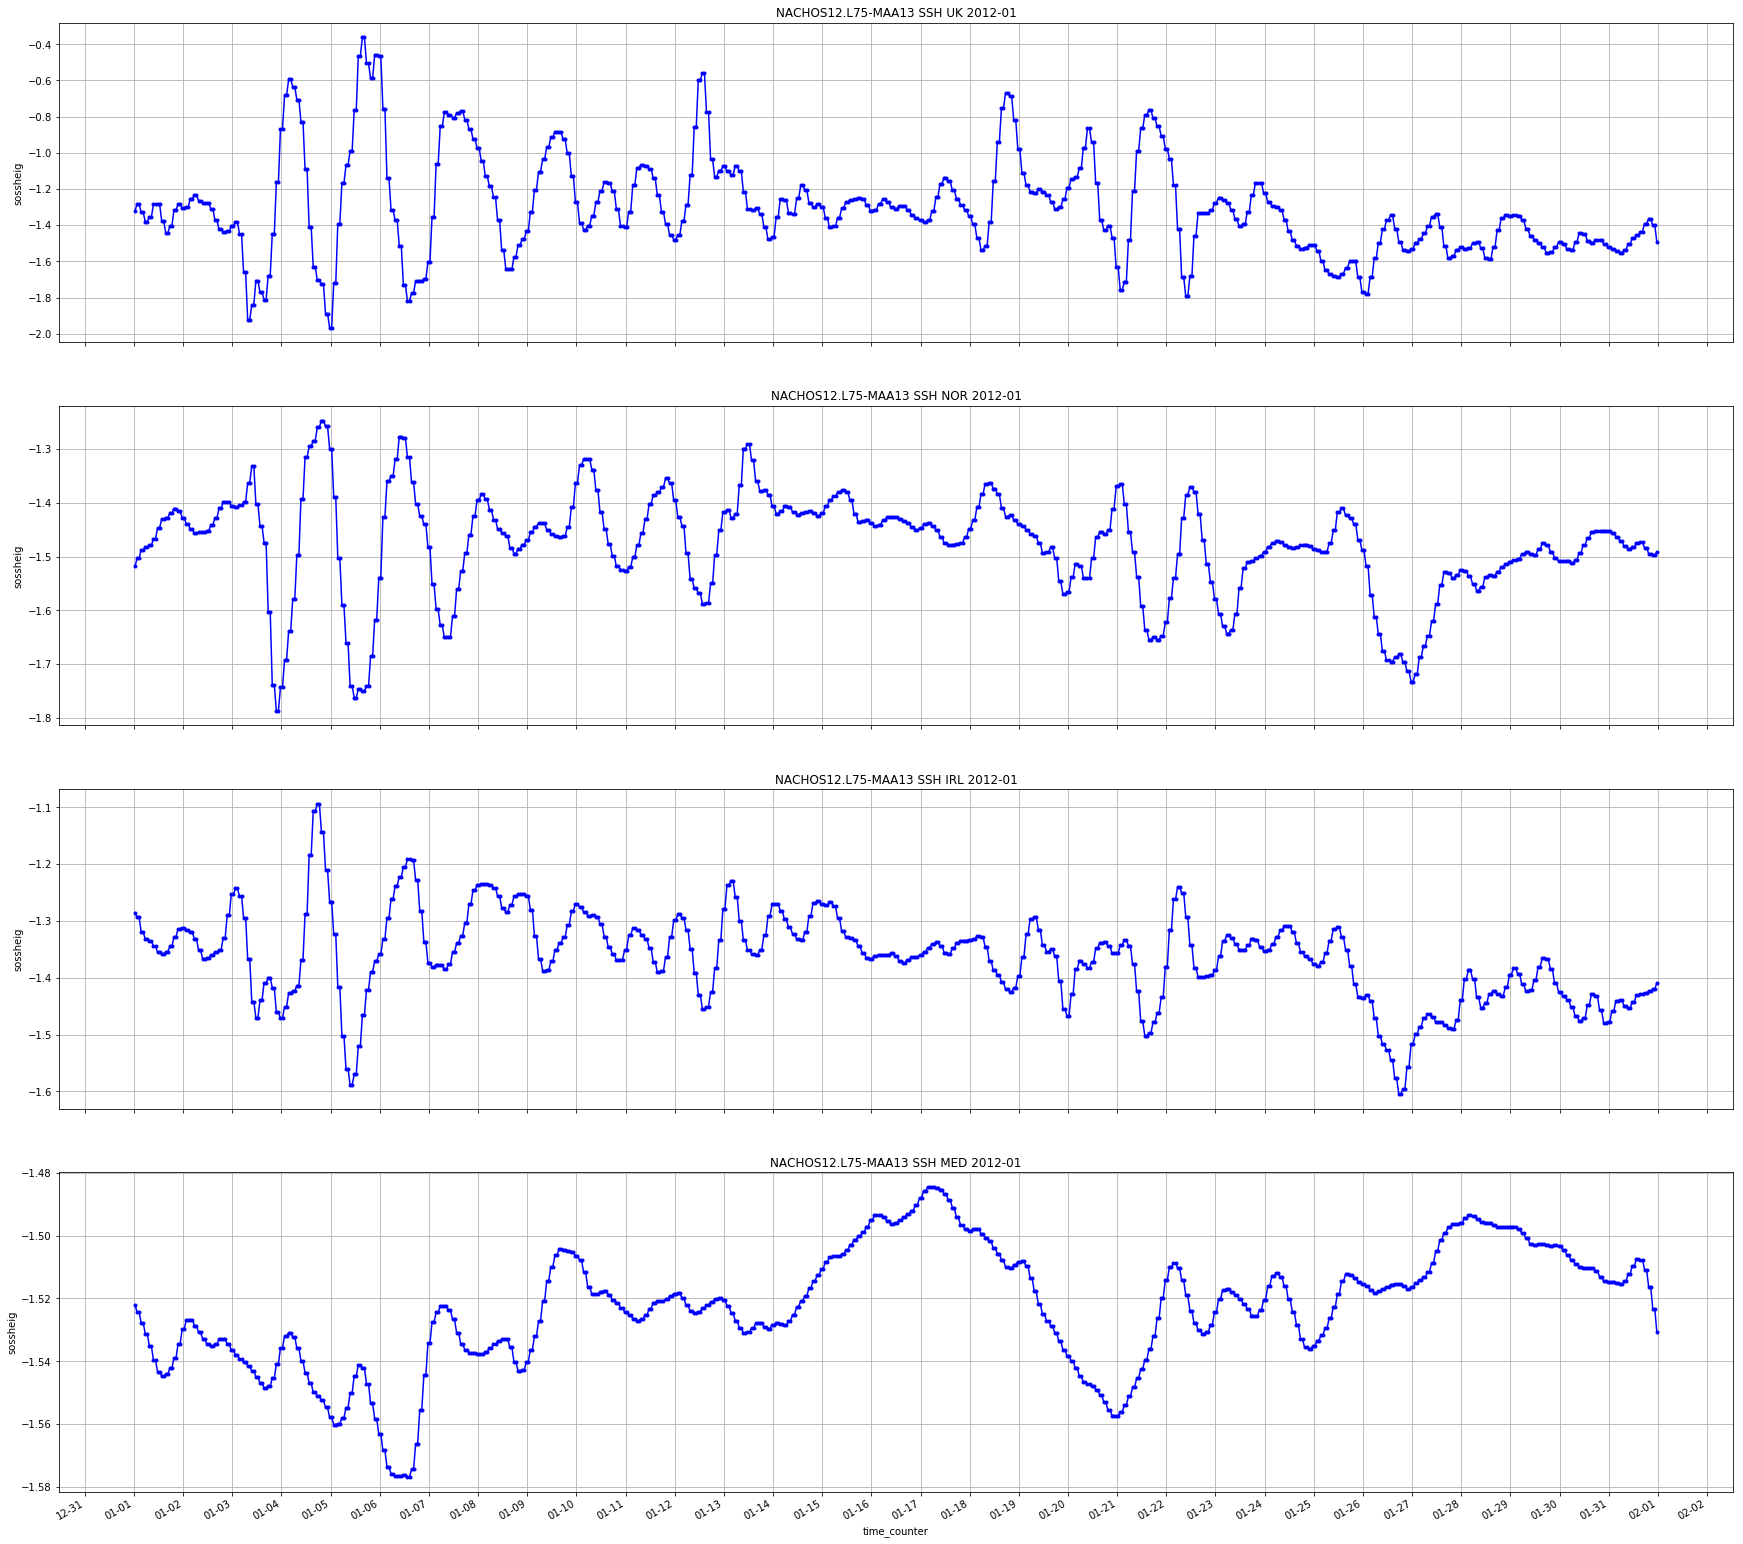

In [103]:
fig=plt.figure(figsize=(30,30))
days = mdates.DayLocator()   # every year
daysFmt = mdates.DateFormatter('%m-%d')

ax = fig.add_subplot(411)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ssh12UK.plot.line('b.-')
plt.title('NACHOS12.L75-MAA13 SSH UK 2012-01')
plt.grid(True)

ax = fig.add_subplot(412)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ssh12NOR.plot.line('b.-')
plt.title('NACHOS12.L75-MAA13 SSH NOR 2012-01')
plt.grid(True)

ax = fig.add_subplot(413)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ssh12IRL.plot.line('b.-')
plt.title('NACHOS12.L75-MAA13 SSH IRL 2012-01')
plt.grid(True)

ax = fig.add_subplot(414)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ssh12MED.plot.line('b.-')
plt.title('NACHOS12.L75-MAA13 SSH MED 2012-01')
plt.grid(True)

plt.savefig('/media/extra/DATA/PLOTS/NACHOS12.L75-MAA13-SSH-UK-201301.png')